In [2]:
# Importing required libraries 
import re
import sklearn, h5py
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

import numpy as np
from numpy import savetxt
from numpy.fft import ifft,ifft2

import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
#from tensorflow import keras
#from tensorflow.python.keras import backend
#from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint
import os
from time import time
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

import keras
from keras import regularizers
from keras import backend
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint, TensorBoard

# Other  
import librosa
import librosa.display

from scipy.io import wavfile
from scipy import signal
from scipy.fft import fft, fftfreq

import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

import pickle
# ignore warnings 
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [10]:
global sampleRate,HOP,HOP_LENGTH,LABELS,MFCC;
sampleRate =48000;
ravdessPath ='/home/czerwone/Desktop/Datasets/Ravdess/';
iemocapPath ='/home/czerwone/Desktop/Datasets/IEMOCAP/Data/Impro';
iemocapLabelPath ='/home/czerwone/Desktop/Datasets/IEMOCAP/Labels';

LABELS = {1:"Neutral", 2:"Calm", 3:"Happy", 4:"Sad", 5:"Angry", 6:"Fearful", 7:"Disgust", 8:"Surprised"};

fileList = getListOfFiles(ravdessPath)
iemocapFiles = getListOfFiles(iemocapPath)



lengthValsRavdess= getDatasetStats(ravdessPath);
#lengthValsIemocap= getDatasetStats(iemocapPath);

1354
1129


In [14]:
signal,_ = librosa.load(fileList[0], res_type='kaiser_best',sr=sampleRate);
signalTest,_ = librosa.effects.trim(signal);
print(len(signal))
print(len(signalTest))

158558
101888


In [23]:
X = getSpectograms(fileList)
Y = np.array(classifyData(ravdessPath));

In [24]:
X_Norm = dataNormalization(X)

In [25]:
cnnInst = cnn(Y[:,0]-1,X_Norm[..., np.newaxis],0.2)
cnnInst.split_train_test()
cnnInst.build_model()

built cnn model..
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 16)        800       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 32)        12832     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 

In [26]:
history = cnnInst.train();

training model
Epoch 1/50
9/9 [==============================] - 4s 347ms/step - loss: 2.0733 - accuracy: 0.1387 - val_loss: 2.0409 - val_accuracy: 0.1562

Epoch 00001: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 2/50
9/9 [==============================] - 3s 290ms/step - loss: 2.0081 - accuracy: 0.2277 - val_loss: 1.9195 - val_accuracy: 0.1979

Epoch 00002: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 3/50
9/9 [==============================] - 2s 268ms/step - loss: 1.8602 - accuracy: 0.2685 - val_loss: 1.8687 - val_accuracy: 0.2639

Epoch 00003: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 4/50
9/9 [==============================] - 3s 318ms/step - loss: 1.7299 - accuracy: 0.2992 - val_loss: 1.7079 - val_accuracy: 0.3507

Epoch 0000


Epoch 00030: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 31/50
9/9 [==============================] - 3s 296ms/step - loss: 0.0697 - accuracy: 0.9777 - val_loss: 2.4196 - val_accuracy: 0.5938

Epoch 00031: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 32/50
9/9 [==============================] - 3s 313ms/step - loss: 0.0934 - accuracy: 0.9676 - val_loss: 1.9260 - val_accuracy: 0.6354

Epoch 00032: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 33/50
9/9 [==============================] - 3s 284ms/step - loss: 0.0778 - accuracy: 0.9679 - val_loss: 2.2296 - val_accuracy: 0.5799

Epoch 00033: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 34/50
9/9 [========

9/9 [==============================] - 0s 22ms/step - loss: 2.1585 - accuracy: 0.6354
Test loss: 2.158463478088379
Test accuracy: 0.6354166865348816
(288,) (288,)
              precision    recall  f1-score   support

           0       0.34      0.88      0.49        17
           1       0.81      0.54      0.65        39
           2       0.67      0.62      0.64        26
           3       0.56      0.40      0.46        48
           4       0.84      0.74      0.79        35
           5       0.71      0.77      0.74        44
           6       0.72      0.71      0.72        41
           7       0.56      0.61      0.58        38

    accuracy                           0.64       288
   macro avg       0.65      0.66      0.63       288
weighted avg       0.67      0.64      0.64       288

[[15  1  0  0  0  1  0  0]
 [11 21  1  2  0  0  2  2]
 [ 2  0 16  1  0  2  1  4]
 [13  1  2 19  1  3  3  6]
 [ 0  0  2  1 26  2  4  0]
 [ 0  3  0  3  2 34  0  2]
 [ 1  0  0  6  1  0 29  

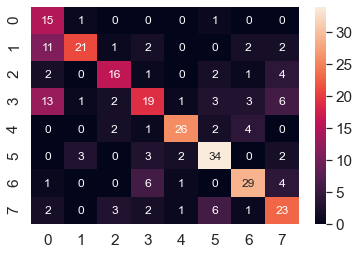

<Figure size 432x288 with 0 Axes>

In [27]:
cnnInst.evaluate();

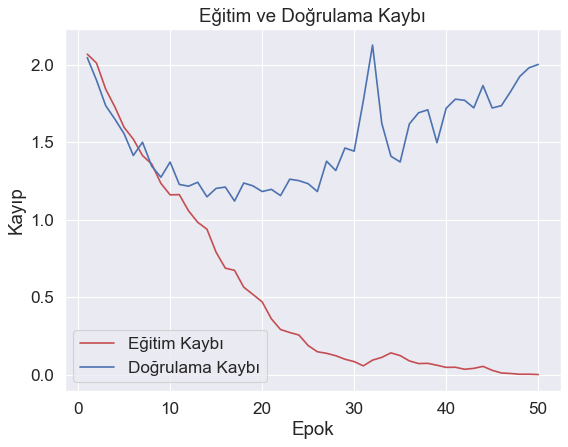

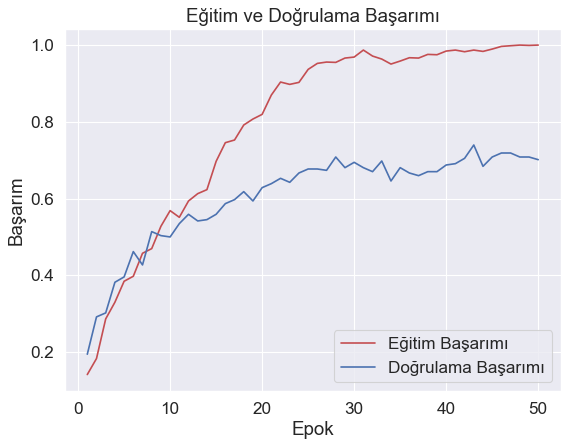

In [203]:
cnnInst.printHistory(history)

In [252]:
Y_Iemo=classifyData(iemocapPath,False)
# Script Emotions
# Neu - 609 Hap - 311 Sad - 476  Ang - 814
# Impro Emotions
# Neu - 1099 Hap - 284 Sad - 608  Ang - 289

In [231]:
iemocapLabelArray = ['neu','hap','sad','ang']
fList,Y = iemocapGetUsedAttributes(iemocapFiles,Y_Iemo,iemocapLabelArray)

In [232]:
X_Iemo=getSpectograms(fList)

In [233]:
X_Iemo_Norm = dataNormalization(X_Iemo)

In [234]:
cnnIemo = cnn(Y-1,X_Iemo_Norm[..., np.newaxis],0.2,4)
cnnIemo.split_train_test()
cnnIemo.build_model()

built cnn model..
Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_246 (Conv2D)          (None, 64, 64, 16)        800       
_________________________________________________________________
conv2d_247 (Conv2D)          (None, 30, 30, 32)        12832     
_________________________________________________________________
conv2d_248 (Conv2D)          (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_249 (Conv2D)          (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_250 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
conv2d_251 (Conv2D)          (None, 2, 2, 128)         73856     
_________________________________________________________________
conv2d_252 (Conv2D)          (None,

In [235]:
historyIemo = cnnIemo.train();

training model
Train on 1768 samples, validate on 442 samples
Epoch 1/50
1768/1768 [==============================] - 7s 4ms/step - loss: 1.3426 - accuracy: 0.3456 - val_loss: 1.2660 - val_accuracy: 0.3959

Epoch 00001: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 2/50
1768/1768 [==============================] - 5s 3ms/step - loss: 1.2631 - accuracy: 0.4135 - val_loss: 1.1543 - val_accuracy: 0.4910

Epoch 00002: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 3/50
1768/1768 [==============================] - 5s 3ms/step - loss: 1.1046 - accuracy: 0.5085 - val_loss: 1.0425 - val_accuracy: 0.5611

Epoch 00003: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 4/50
1768/1768 [==============================] - 5s 3ms/step - loss: 1.0695 - accurac

1768/1768 [==============================] - 5s 3ms/step - loss: 0.0527 - accuracy: 0.9808 - val_loss: 2.6506 - val_accuracy: 0.5747

Epoch 00030: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 31/50
1768/1768 [==============================] - 5s 3ms/step - loss: 0.0557 - accuracy: 0.9819 - val_loss: 2.9852 - val_accuracy: 0.5566

Epoch 00031: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 32/50
1768/1768 [==============================] - 5s 3ms/step - loss: 0.0364 - accuracy: 0.9893 - val_loss: 3.0951 - val_accuracy: 0.5814

Epoch 00032: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 33/50
1768/1768 [==============================] - 5s 3ms/step - loss: 0.0268 - accuracy: 0.9949 - val_loss: 3.2551 - val_accuracy: 0.5928

Epoch 00033: savi

442/442 [==============================] - 0s 566us/step
Test loss: 2.8754982667810776
Test accuracy: 0.5882353186607361
(442,) (442,)
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       129
           1       0.29      0.26      0.27        46
           2       0.57      0.41      0.48        92
           3       0.71      0.81      0.75       175

    accuracy                           0.59       442
   macro avg       0.52      0.50      0.51       442
weighted avg       0.58      0.59      0.58       442

[[ 69  13  19  28]
 [ 14  12   7  13]
 [ 27  10  38  17]
 [ 24   7   3 141]]


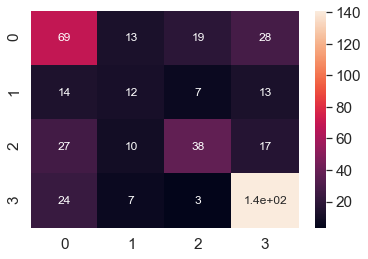

<Figure size 432x288 with 0 Axes>

In [236]:
cnnIemo.evaluate();

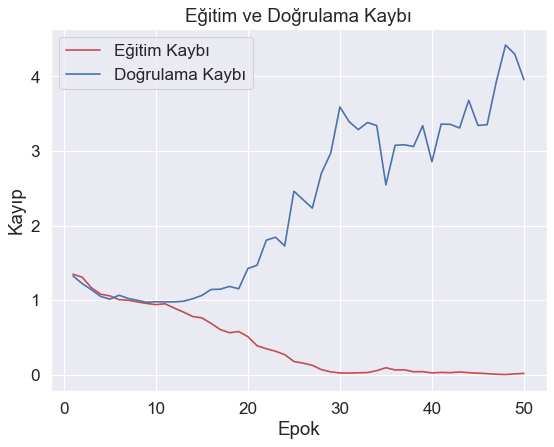

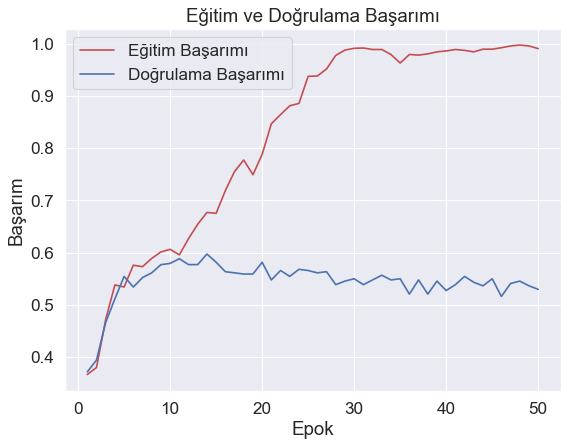

In [161]:
cnnIemo.printHistory(historyIemo)

In [336]:
ravdessLabelArray =[1,3,4,5]
newFileList = ravdessGetUsedOnlyData(fileList,[1,3,4,5])

X_Rav = getSpectograms(newFileList)
Y_Rav = np.array(classifyData(ravdessPath,True,newFileList))[:,0]

#Converting Ravdess into IEMOCAP Labeling
Y_Rav = Y_Rav-1
Y_Rav[Y_Rav==0]=1


Y_Iemo=classifyData(iemocapPath,False)
iemocapLabelArray = ['neu','hap','sad','ang']
fList,Y_Iemo = iemocapGetUsedAttributes(iemocapFiles,Y_Iemo,iemocapLabelArray)
X_Iemo=getSpectograms(fList)

In [337]:
Y_Both = np.concatenate((Y_Rav,Y_Iemo),axis=0)
X_Both = np.concatenate((X_Rav,X_Iemo),axis=0)

In [338]:
X_Both_Norm = dataNormalization(X_Both)

In [339]:
cnnBoth = cnn(Y_Both-1,X_Both_Norm[..., np.newaxis],0.2,4)
cnnBoth.split_train_test()
cnnBoth.build_model()

built cnn model..
Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_260 (Conv2D)          (None, 64, 64, 16)        800       
_________________________________________________________________
conv2d_261 (Conv2D)          (None, 30, 30, 32)        12832     
_________________________________________________________________
conv2d_262 (Conv2D)          (None, 15, 15, 32)        9248      
_________________________________________________________________
conv2d_263 (Conv2D)          (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_264 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
conv2d_265 (Conv2D)          (None, 2, 2, 128)         73856     
_________________________________________________________________
conv2d_266 (Conv2D)          (None,

In [340]:
historyBoth = cnnBoth.train()

training model
Train on 2361 samples, validate on 591 samples
Epoch 1/50
2361/2361 [==============================] - 7s 3ms/step - loss: 1.3061 - accuracy: 0.4168 - val_loss: 1.2773 - val_accuracy: 0.4247

Epoch 00001: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 2/50
2361/2361 [==============================] - 6s 3ms/step - loss: 1.2298 - accuracy: 0.4435 - val_loss: 1.1697 - val_accuracy: 0.4856

Epoch 00002: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 3/50
2361/2361 [==============================] - 7s 3ms/step - loss: 1.1056 - accuracy: 0.5142 - val_loss: 1.1530 - val_accuracy: 0.4755

Epoch 00003: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 4/50
2361/2361 [==============================] - 6s 3ms/step - loss: 1.0595 - accurac

2361/2361 [==============================] - 7s 3ms/step - loss: 0.0795 - accuracy: 0.9776 - val_loss: 2.1079 - val_accuracy: 0.6379

Epoch 00030: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 31/50
2361/2361 [==============================] - 7s 3ms/step - loss: 0.1041 - accuracy: 0.9644 - val_loss: 1.9617 - val_accuracy: 0.5871

Epoch 00031: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 32/50
2361/2361 [==============================] - 7s 3ms/step - loss: 0.0613 - accuracy: 0.9797 - val_loss: 1.9736 - val_accuracy: 0.6565

Epoch 00032: saving model to /home/czerwone/Desktop/Projects/Python/EmotionRecognition/Mustaqeem_Saved_Models/keras_cnn_trained_model.h5
Epoch 33/50
2361/2361 [==============================] - 7s 3ms/step - loss: 0.0378 - accuracy: 0.9886 - val_loss: 2.1310 - val_accuracy: 0.6514

Epoch 00033: savi

591/591 [==============================] - 0s 614us/step
Test loss: 2.27958295308999
Test accuracy: 0.6903553009033203
(591,) (591,)
              precision    recall  f1-score   support

           0       0.66      0.78      0.72       224
           1       0.46      0.33      0.38        91
           2       0.77      0.75      0.76       169
           3       0.78      0.71      0.75       107

    accuracy                           0.69       591
   macro avg       0.67      0.64      0.65       591
weighted avg       0.68      0.69      0.68       591

[[175  17  24   8]
 [ 42  30  11   8]
 [ 30   7 127   5]
 [ 17  11   3  76]]


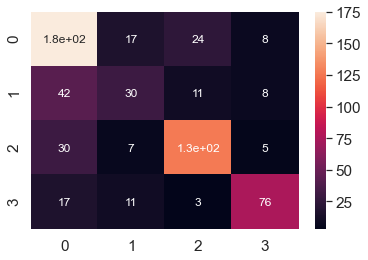

<Figure size 432x288 with 0 Axes>

In [341]:
cnnBoth.evaluate()

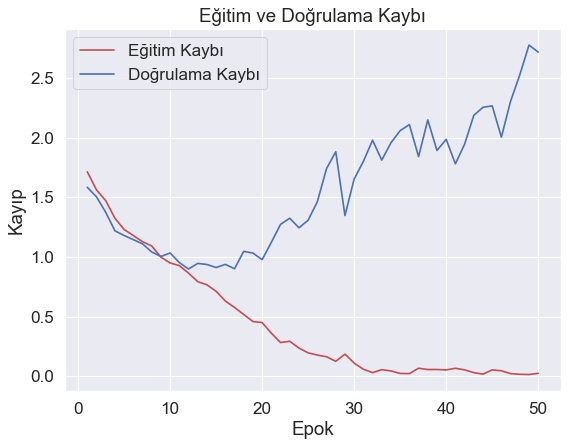

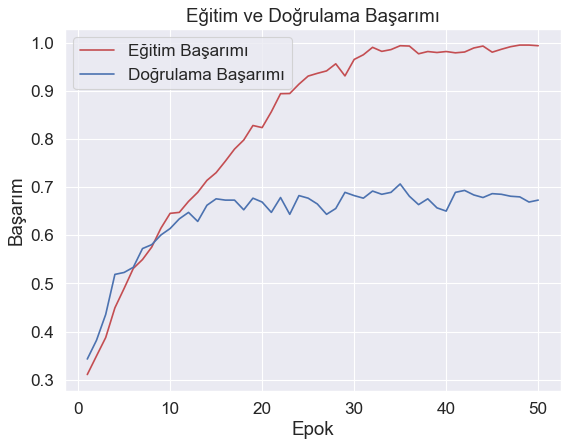

In [272]:
cnnBoth.printHistory(historyBoth)

In [22]:
def getSpectograms(fileList,preEmph = True):
    spectogramList = np.zeros((len(fileList),128,128))
    ind = 0
    for entry in fileList:
        signalData,_ = librosa.load(entry, res_type='kaiser_fast',sr=sampleRate);
        if preEmph:
            pre_emphasis = 0.97
            signalData = np.append(signalData[0], signalData[1:] - pre_emphasis * signalData[:-1])
        hopSize = int(np.ceil(len(signalData)/128))
        spectogram = np.abs(librosa.stft(signalData,n_fft=hopSize*2,hop_length=hopSize)**2)
        spectogram = librosa.power_to_db(spectogram,ref=np.max)
        mel = librosa.filters.mel(sr=sampleRate,n_fft=hopSize*2, n_mels=128)
        melSpectogram = mel.dot(spectogram)
        spectogramList[ind,:,:] = melSpectogram[:,0:128]
        ind = ind+1
    return spectogramList
        

In [4]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    listOfFile = sorted(os.listdir(dirName))
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)                
    return allFiles

In [5]:
def getDatasetStats(pathName,IsRavdess = True):
    length = [];
    labels = [0]*8;
    fileList = getListOfFiles(pathName);
    for entry in fileList:
        #Calculate length
        audio = librosa.load(entry,sr=sampleRate)[0];
        length.append(len(librosa.effects.trim(audio)[0]));
    meanLength,minLength,maxLength = np.mean(length),np.min(length),np.max(length);
    
    print(length.index(minLength))
    print(length.index(maxLength))
    return [meanLength,minLength,maxLength];

In [6]:
def classifyData(fileName,IsRavdess = True,customFileList=None):
    #3 Emotion (1-Neutral 2-Calm 3-Happy 4-Sad 5-Angry 6-Scared 7-Disgust 8-Surprised)
    #4 Emotional Intensity(1-Normal 2-Strong)
    #7 Actor (%2 == 1 Male %2 == 0 Female)
        dataFeature = list();
        if customFileList is None:
            fileList = getListOfFiles(fileName)
        else:
            fileList = customFileList
            
        for entry in fileList:
            dataFeature.append(extractFromFName(entry,IsRavdess));
        return dataFeature;

def extractFromFName(fileName,IsRavdess = True):
    if IsRavdess:
        fileName = fileName.split('/')[-1]; #Choosing the filename only
        fileName = fileName.split('.')[0].split('-'); #Removing .wav then splitting info numbers
        fileName = [int(i) for i in fileName]; #Converting string array into int array
        val = [fileName[2],fileName[3],fileName[6]%2];
    else: #IEMOCAP Dataset Extraction
        fileName = fileName.split('/')[-1].split('.')[0]
        if "impro" in fileName:
            labelFileName= fileName.split('_')[0]+'_'+fileName.split('_')[1]+'.txt'
        else:
            labelFileName= fileName.split('_')[0]+'_'+fileName.split('_')[1]+'_'+fileName.split('_')[2]+'.txt'
        
        with open(iemocapLabelPath+'/'+labelFileName, 'r') as f:
            lines = f.readlines()
            for line in lines:
                if re.search(fileName, line):
                    emotion = line.split('\t')[2]
                    break
        val=emotion        
    return val

def ravdessGetUsedOnlyData(fileList,usedAttributes):
    newFileList =[]
    for file in fileList:
        fileName = file.split('/')[-1]; #Choosing the filename only
        fileName = fileName.split('.')[0].split('-'); #Removing .wav then splitting info numbers
        fileName = [int(i) for i in fileName]; #Converting string array into int array
        if fileName[2] in usedAttributes:
            newFileList.append(file)
    return newFileList

In [7]:
def iemocapGetUsedAttributes(fileList,Y,usedAttributes):
    iemocapLabels = {'neu':1, 'hap':2, 'sad':3, "ang":4}
    deletedIndexes = []
    dictY =[]
    ind = 0
    for em in Y:
        if em not in usedAttributes:
            deletedIndexes.append(ind)
        ind = ind+1
    
    for index in sorted(deletedIndexes, reverse=True):
        del fileList[index]
        del Y[index]
    
    for emotion in Y:
        dictY.append(iemocapLabels[emotion])
        
    return [fileList,np.array(dictY)]

In [8]:
def dataNormalization(X):
    mean = np.mean(X, axis=(1,2), keepdims=True);
    std = np.std(X,axis=(1,2),keepdims=True);
    X = (X-mean)/std;
    return X;

In [9]:
class cnn:
    def __init__(self, labels, features, test_size=0.2, num_classes=8, epochs=50,
                 batch_size=128):  # not sure if ideal // hyperparmeter tuning needed
        self.labels = labels
        self.features = features
        
        self.test_size = test_size
        self.x_train = None
        self.y_train = None
        
        self.x_test = None
        self.y_test = None
        self.model = None
        self.num_classes = num_classes
        self.epochs = epochs
        self.batch_size = batch_size

    def split_train_test(self):
        self.x_train, self.x_test, self.y_train, self.y_test = sklearn.model_selection.train_test_split(
            self.features, self.labels, test_size=self.test_size, random_state=np.random)
        
        
        
        # we need to transform x and turn y into one hot
        #self.x_train = self.x_train[..., np.newaxis] # add new dimension      
        #self.x_test = self.x_test[..., np.newaxis] 
        self.y_train = keras.utils.to_categorical(self.y_train, self.num_classes)
        self.y_test = keras.utils.to_categorical(self.y_test, self.num_classes) 
        
        #Save Variables
        if os.path.exists(os.getcwd()+'/Variables/Mustaqeem/dataVariables_Mustaqeem.pkl') == False:
            if os.path.exists(os.getcwd()+'/Variables/Mustaqeem/') == False: 
                os.makedirs(os.getcwd()+"/Variables/Mustaqeem")
            pickle_out = open("Variables/Huang/dataVariables_Mustaqeem.pkl","wb")
        
        with open('Variables/Huang/dataVariables_Mustaqeem.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
            pickle.dump([self.x_train,self.x_test,self.y_train,self.y_test], f)

    def loadPreviousVariables(self):
        with open('Variables/Huang/dataVariables_Mustaqeem.pkl','rb') as f:  # Python 3: open(..., 'rb')
            self.x_train,self.x_test,self.y_train,self.y_test = pickle.load(f)
        
    def build_model(self):
        layers = keras.layers
        
        self.model = keras.Sequential([
            layers.Conv2D(16, (7, 7),strides=(2,2), padding='same',
                          activation=tf.nn.relu, input_shape=self.x_train.shape[1:]), 
            #layers.BatchNormalization(),
            layers.Conv2D(32, (5, 5),strides=(2,2), activation=tf.nn.relu),
            #layers.BatchNormalization(),
            layers.Conv2D(32, (3, 3),strides=(2,2),padding='same', activation=tf.nn.relu),
            #layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3),strides=(2,2), activation=tf.nn.relu),
            #layers.BatchNormalization(),
            layers.Conv2D(64, (3, 3),strides=(2,2), activation=tf.nn.relu),
            #layers.BatchNormalization(),
            layers.Conv2D(128, (3, 3),strides=(2,2),padding='same', activation=tf.nn.relu),
            #layers.BatchNormalization(),
            layers.Conv2D(128, (3, 3),strides=(2,2),padding='same', activation=tf.nn.relu),
            #layers.BatchNormalization(),
            layers.Flatten(),
            
            layers.Dense(512, activation='relu'),
            layers.Dropout(0.25),
            
            layers.Dense(self.num_classes, activation='softmax'),
        ])
        opt = keras.optimizers.Adam(learning_rate=0.001)
        self.model.compile(loss='categorical_crossentropy',
                           optimizer=opt,
                           metrics=['accuracy'],)
        print("built cnn model..")
        print(self.model.summary())

    def train(self):
        print("training model")
        save_dir = os.path.join(os.getcwd(), 'Mustaqeem_Saved_Models')
        model_name = 'keras_cnn_trained_model.h5'
        if not os.path.isdir(save_dir):
            os.makedirs(save_dir)
        model_path = os.path.join(save_dir, model_name)
        # if os.path.isfile(model_path):
        #     self.model.load_weights(model_path)
        #callback = tf.keras.callbacks.LearningRateScheduler(scheduler)
        checkpoint = ModelCheckpoint(
            model_path, monitor='val_acc', verbose=1, save_best_only=False, mode='max')
        tensorboard = TensorBoard(log_dir="logs/{}".format(time()), write_graph=True,
                                  write_images=True, histogram_freq=0)
        history = self.model.fit(self.x_train, self.y_train,
                  batch_size=self.batch_size,
                  epochs=self.epochs,
                  validation_data=(self.x_test, self.y_test),
                  shuffle=True,
                  callbacks=[tensorboard, checkpoint]
                  #callbacks=[tensorboard, checkpoint,callback]
                                )
        return history
               
    def printHistory(self,history):
        import matplotlib.pyplot as plt
        from matplotlib.pyplot import figure

        figure(figsize=(8, 6), dpi=80)
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        
        epochs = range(1, len(acc) + 1)
        plt.plot(epochs, loss, 'r-', label='Eğitim Kaybı')
        plt.plot(epochs, val_loss, 'b-', label='Doğrulama Kaybı')
        plt.title('Eğitim ve Doğrulama Kaybı')
        plt.xlabel('Epok')
        plt.ylabel('Kayıp')
        plt.legend()
        plt.show()

        figure(figsize=(8, 6), dpi=80)
        plt.plot(epochs, acc, 'r-', label='Eğitim Başarımı')
        plt.plot(epochs, val_acc, 'b-', label='Doğrulama Başarımı')
        plt.title('Eğitim ve Doğrulama Başarımı')
        plt.xlabel('Epok')
        plt.ylabel('Başarım')
        plt.legend()
        plt.show()
        

    def evaluate(self):
        scores = self.model.evaluate(self.x_test, self.y_test, verbose=1)
        print('Test loss:', scores[0])
        print('Test accuracy:', scores[1])

        from sklearn.metrics import classification_report
        predictions = self.model.predict_classes(self.x_test)
        # add roc_auc
        y_new = np.argmax(self.y_test, axis=1)
        print(np.shape(predictions), np.shape(y_new))
        report = classification_report(y_new, predictions)
        print(report)

        
        matrix = confusion_matrix(y_new, predictions)
        print (matrix)
        df_cm = pd.DataFrame(matrix, range(self.num_classes),
                  range(self.num_classes))
        # plt.figure(figsize = (10,7))
        sn.set(font_scale=1.4)#for label size
        sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
        plt.show()
        plt.savefig('confusion_matrix.pdf')
        plt.savefig('confusion_matrix.pgf') # for latex

        
def scheduler(epoch, lr):
    if epoch != 0 and int(epoch)%10==0:
        return lr * tf.math.exp(-0.1)
    else:
        return lr